In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pylab as plt
from sklearn import tree
from sklearn import ensemble
import graphviz 
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
%matplotlib inline
import seaborn as sns 
sns.set_style('darkgrid')

#### Read data

For 2016, use this url: https://www.kaggle.com/osmi/mental-health-in-tech-2016

For 2017, use this url: https://www.kaggle.com/osmihelp/osmi-mental-health-in-tech-survey-2017

In [2]:
df16 = pd.read_csv("mental-heath-in-tech-2016_20161114.csv")
df17 = pd.read_csv("OSMI Mental Health in Tech Survey 2017.csv")

### Let's look at different Countries for 2016 and 2017

#### Percentage of survey takers having Mental Health problem in 2016

In [3]:
country16 = pd.DataFrame(df16['What country do you work in?'].value_counts())
MHcount = df16[['What country do you work in?','Do you currently have a mental health disorder?']].replace(['Yes'
          , 'No', 'Maybe'], [1,0,0]).groupby('What country do you work in?').sum()
country16 = country16.merge(MHcount, left_on=country16.index, right_on=MHcount.index).rename(columns={'key_0':
            'Country', 'What country do you work in?':'Total', 'Do you currently have a mental health disorder?':'MH'})

Tcount16 = df16[['What country do you work in?', 'Is your employer primarily a tech company/organization?'
                ]].replace(np.nan,0).groupby('What country do you work in?').sum()
country16 = country16.merge(Tcount16, left_on='Country', right_on=Tcount16.index).rename(columns={
    'Is your employer primarily a tech company/organization?':'TCount'})

MHT16 = df16[df16['Do you currently have a mental health disorder?'] != 'No'][[
    'What country do you work in?', 'Is your employer primarily a tech company/organization?']].groupby(
    'What country do you work in?').sum()
country16 = country16.merge(MHT16, left_on='Country', right_on=MHT16.index).rename(columns={
    'Is your employer primarily a tech company/organization?':'MHinT'})

country16['MH-Perct'] = country16['MH'] / country16['Total']
country16['MHT-Perct'] = country16['MHinT'] / country16['TCount']

In [4]:
country16[:11]

,Country,Total,MH,TCount,MHinT,MH-Perct,MHT-Perct
0,United States of America,851,398,547.0,368.0,0.467685,0.672761
1,United Kingdom,183,64,97.0,56.0,0.349727,0.577320
2,Canada,74,22,52.0,27.0,0.297297,0.519231
3,Germany,58,11,35.0,17.0,0.189655,0.485714
4,Netherlands,47,21,22.0,11.0,0.446809,0.500000
5,Australia,34,16,21.0,13.0,0.470588,0.619048
6,Sweden,20,4,12.0,6.0,0.200000,0.500000
7,Ireland,15,6,8.0,5.0,0.400000,0.625000
8,France,14,3,10.0,2.0,0.214286,0.200000
9,Brazil,10,4,5.0,2.0,0.400000,0.400000


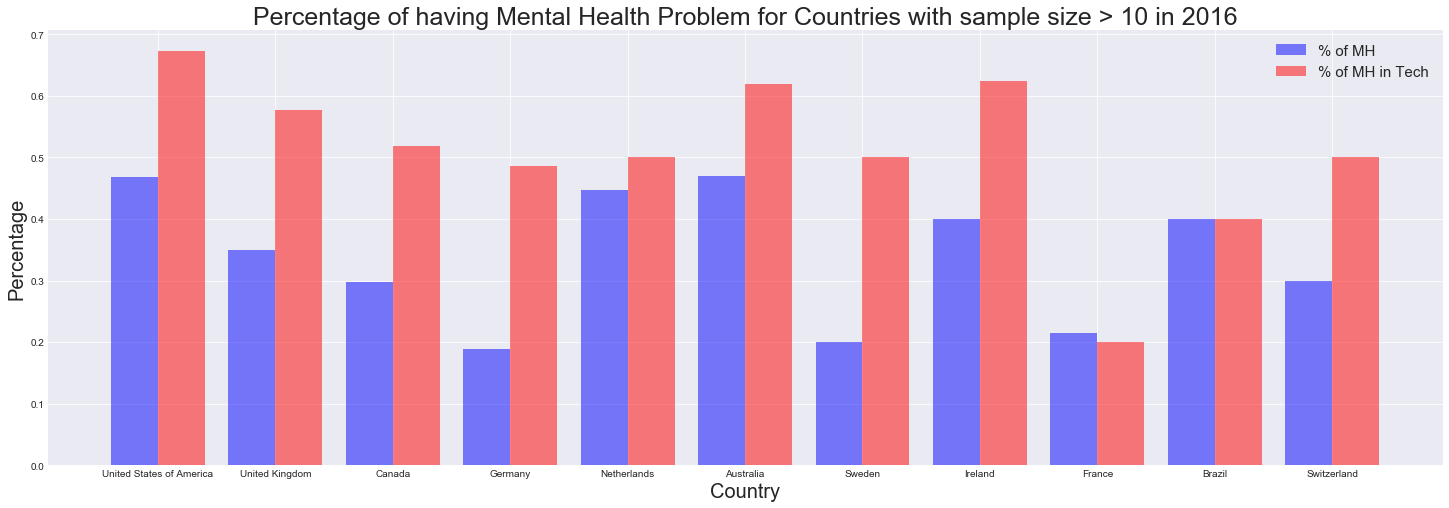

In [5]:
_X = np.arange(len(country16[:11]['Country'].tolist()))

plt.figure(figsize=(25,8))
plt.bar(_X - 0.2, country16[:11]['MH-Perct'], 0.4, label='% of MH', color='blue', alpha=0.5)
plt.bar(_X + 0.2, country16[:11]['MHT-Perct'], 0.4, label='% of MH in Tech', color='red', alpha=0.5)
plt.xticks(_X, country16[:11]['Country'].tolist())
plt.ylabel("Percentage", fontsize=20)
plt.xlabel("Country", fontsize=20)
plt.title("Percentage of having Mental Health Problem for Countries with sample size > 10 in 2016", fontsize=25)
plt.legend(fontsize=15)
plt.show()

Figure1: We can see that most countries have higher percentage of having mental health issue in technology companies than in general in 2016.

#### Percentage of survey takers having Mental Health problem in 2017

In [6]:
US17 = df17[df17['What country do you <strong>work</strong> in?'] == 'United States of Americas']

In [7]:
country17 = pd.DataFrame(df17['What country do you <strong>work</strong> in?'].value_counts())
MHcount17 = df17[['What country do you <strong>work</strong> in?',
                  'Do you currently have a mental health disorder?']].replace(['Yes', 'Possibly',
                  'No', "Don't Know"], [1,1,0,0]).groupby('What country do you <strong>work</strong> in?').sum()
country17 = country17.merge(MHcount17, left_on=country17.index, right_on=MHcount17.index).rename(columns={
    'key_0':'Country', 'What country do you <strong>work</strong> in?':'Total', 
    'Do you currently have a mental health disorder?': 'MH'})
Tcount17 = df17[['What country do you <strong>work</strong> in?', 
                 'Is your employer primarily a tech company/organization?']].replace(np.nan,0).groupby(
    'What country do you <strong>work</strong> in?').sum()
country17 = country17.merge(Tcount17, left_on='Country', right_on=Tcount17.index).rename(columns={
    'Is your employer primarily a tech company/organization?':'TCount'})
MHT17 = df17[df17['Do you currently have a mental health disorder?'] != 'No'][[
    'What country do you <strong>work</strong> in?', 
    'Is your employer primarily a tech company/organization?']].groupby(
    'What country do you <strong>work</strong> in?').sum()
country17 = country17.merge(MHT17, left_on='Country', right_on=MHT17.index).rename(columns={
    'Is your employer primarily a tech company/organization?':'MHinT'})
country17['MH-Perct'] = country17['MH'] / country17['Total']
country17['MHT-Perct'] = country17['MHinT'] / country17['TCount']

In [8]:
country17[:9]

,Country,Total,MH,TCount,MHinT,MH-Perct,MHT-Perct
0,United States of America,503,343,348.0,253.0,0.681909,0.727011
1,United Kingdom,66,43,38.0,27.0,0.651515,0.710526
2,Canada,26,19,12.0,10.0,0.730769,0.833333
3,Germany,22,12,14.0,9.0,0.545455,0.642857
4,France,16,3,11.0,5.0,0.187500,0.454545
5,Spain,15,1,12.0,6.0,0.066667,0.500000
6,Netherlands,14,7,9.0,5.0,0.500000,0.555556
7,India,12,6,7.0,4.0,0.500000,0.571429
8,Australia,12,8,7.0,3.0,0.666667,0.428571


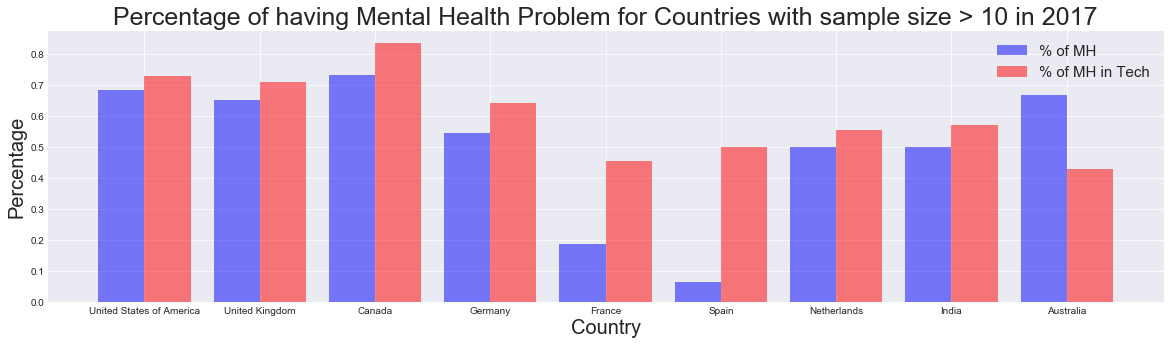

In [9]:
_X = np.arange(len(country17[:9]['Country'].tolist()))

plt.figure(figsize=(20,5))
plt.bar(_X - 0.2, country17[:9]['MH-Perct'], 0.4, label='% of MH', color='blue', alpha=0.5)
plt.bar(_X + 0.2, country17[:9]['MHT-Perct'], 0.4, label='% of MH in Tech', color='red', alpha=0.5)
plt.xticks(_X, country17[:9]['Country'].tolist())
plt.ylabel("Percentage", fontsize=20)
plt.xlabel("Country", fontsize=20)
plt.title("Percentage of having Mental Health Problem for Countries with sample size > 10 in 2017", fontsize=25)
plt.legend(fontsize=15)
plt.show()

Figure2: We can see that most countries have higher percentage of having mental health issue in technology companies than in general in 2017. Comparing to 2016, the percentage generally increases.

### Within the United States in 2016

In [10]:
US16 = df16[df16['What country do you work in?'] == 'United States of America']

In [11]:
MH16 = US16[['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Have you been diagnosed with a mental health condition by a medical professional?', 
        'Have you had a mental health disorder in the past?',
       'Do you currently have a mental health disorder?',
       'Is your employer primarily a tech company/organization?', 'What is your age?', 
       'What is your gender?', 'What US state or territory do you work in?']]

In [12]:
MH16 = MH16.rename(columns={'Are you self-employed?':'Self-employed', 
                            'How many employees does your company or organization have?': 'Size', 
                            'Have you been diagnosed with a mental health condition by a medical professional?':
                            'previous_diagnosed', 'Have you had a mental health disorder in the past?':'MH_past', 
                            'Do you currently have a mental health disorder?':'MH_now',
                            'Is your employer primarily a tech company/organization?':'Tech', 
                            'What is your age?':'Age', 'What is your gender?':'Gender', 
                            'What US state or territory do you work in?':'State'})

In [13]:
MH16.dropna(inplace=True)
MH16 = MH16.drop(columns=['Self-employed'])

In [14]:
MH16 = MH16[MH16['Age'] <= (MH16.Age.mean() + 3 * MH16.Age.std())]

In [15]:
MH16.head()

,Size,previous_diagnosed,MH_past,MH_now,Tech,Age,Gender,State
1,6-25,Yes,Yes,Yes,1.0,29,male,Illinois
4,6-25,Yes,Yes,Yes,0.0,43,Female,Illinois
6,26-100,No,No,No,1.0,30,M,Tennessee
7,More than 1000,Yes,Yes,Yes,1.0,37,female,Virginia
8,26-100,Yes,Yes,Yes,0.0,44,Female,California


In [16]:
#Classifying gender
Male = ['Male', 'male','M', 'm', 'Male ', 'Male (cis)','Dude', 'cisdude', 'cis man', 'Male.',
        'Cis male', 'male ', 'Sex is male', 'cis male', 'Man', 'Cis Male', 'mail']
Female = ['Female', 'female','F', 'f', 'Female ',
       'woman', 'Woman', 'genderqueer woman','fm', 'Cis-woman', ' Female',
       'fem','female/woman','Cisgender Female','female ']
Other = ['non-binary', 'Agender', 
       'Male/genderqueer', 'Other',
       'Female or Multi-Gender Femme', 'none of your business','Human', 'genderqueer',
       'Female (props for making this a freeform field, though)',
       'Genderflux demi-girl', 'Genderfluid', 'Genderqueer']

In [17]:
MH16['Gender'] = MH16['Gender'].replace(Male,2).replace(Female,1).replace(Other,0)

In [18]:
MH16['previous_diagnosed'] = MH16.previous_diagnosed.map({'Yes':1, 'No':0})
MH16['MH_now'] = MH16.MH_now.map({'Yes':1, 'Maybe':1, 'No':0})
MH16['MH_past'] = MH16.MH_past.map({'Yes':1, 'Maybe':0, 'No':0})
MH16['Size'] = MH16.Size.replace(['26-100','6-25','1-5'],0).replace(['100-500', 
                                                                     '500-1000'],1).replace('More than 1000',2)

In [19]:
MH16.head()

,Size,previous_diagnosed,MH_past,MH_now,Tech,Age,Gender,State
1,0,1,1,1,1.0,29,2,Illinois
4,0,1,1,1,0.0,43,1,Illinois
6,0,0,0,0,1.0,30,2,Tennessee
7,2,1,1,1,1.0,37,1,Virginia
8,0,1,1,1,0.0,44,1,California


In [20]:
USMHT16 = MH16[MH16['Tech'] == 1].groupby('State').sum()[['MH_now']].sort_values(by='MH_now', ascending=False)
UST16 = MH16.groupby('State').sum()[['Tech']].sort_values(by='Tech', ascending=False)
UST16 = UST16.merge(USMHT16, left_on=UST16.index, right_on=USMHT16.index).rename(columns = {'key_0':'State'})
UST16['Perct'] = UST16['MH_now'] / UST16['Tech']

In [21]:
UST16[:19]

,State,Tech,MH_now,Perct
0,California,108.0,75,0.694444
1,Illinois,35.0,22,0.628571
2,Michigan,35.0,21,0.600000
3,New York,29.0,21,0.724138
4,Washington,29.0,20,0.689655
5,Minnesota,28.0,18,0.642857
6,Texas,25.0,21,0.840000
7,Pennsylvania,23.0,17,0.739130
8,Oregon,22.0,12,0.545455
9,Colorado,20.0,14,0.700000


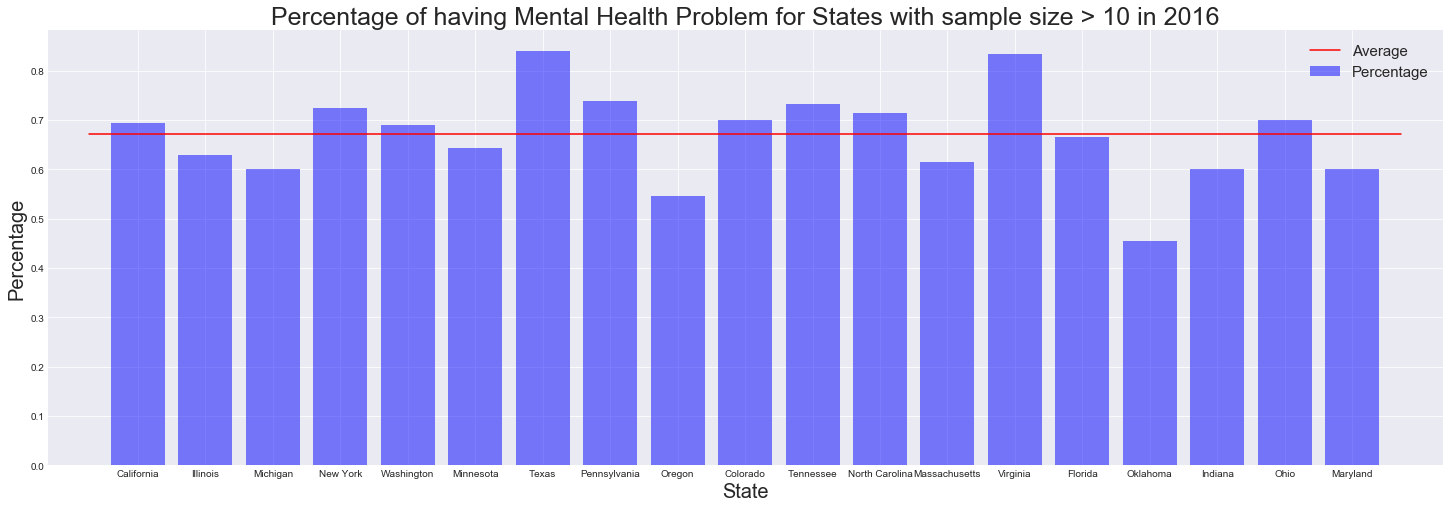

In [22]:
plt.figure(figsize=(25,8))
plt.bar(UST16[:19]['State'], UST16[:19]['Perct'], color='blue', alpha=0.5, label='Percentage')
plt.axhline(y=country16.iloc[0]['MHT-Perct'], color='red', xmin=0.03, xmax=0.97, label='Average')
plt.ylabel("Percentage", fontsize=20)
plt.xlabel("State", fontsize=20)
plt.title("Percentage of having Mental Health Problem for States with sample size > 10 in 2016", fontsize=25)
plt.legend(fontsize=15)

Figure3: The percentage of having mental health problem within technology companies for states with sample size larger than 10. The red line indicates the average for the United States and we can see several states is above average.

## Decision Tree

**MH16_ is the dataset used for decision tree classifier. 'MH_past' combines 'previous_diagnosed' and 'MH_past'. If either one is yes, individual is counted as having medical health problem before.**

In [23]:
MH16_ = MH16[['Size', 'previous_diagnosed', 'MH_past', 'MH_now', 'Tech', 'Age',
       'Gender']]
MH16_.head()

,Size,previous_diagnosed,MH_past,MH_now,Tech,Age,Gender
1,0,1,1,1,1.0,29,2
4,0,1,1,1,0.0,43,1
6,0,0,0,0,1.0,30,2
7,2,1,1,1,1.0,37,1
8,0,1,1,1,0.0,44,1


In [24]:
MH16_['MH_past'] = MH16_['previous_diagnosed'] + MH16_['MH_past']
MH16_['MH_past'] = MH16_.MH_past.replace({2:1})
MH16_.drop(columns=['previous_diagnosed'], inplace=True)
MH16_.head()

/Users/Christine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Christine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Christine/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

,Size,MH_past,MH_now,Tech,Age,Gender
1,0,1,1,1.0,29,2
4,0,1,1,0.0,43,1
6,0,0,0,1.0,30,2
7,2,1,1,1.0,37,1
8,0,1,1,0.0,44,1


**MH16f is independent variables used in decision tree.**

In [25]:
MH16fp = MH16_[['MH_past', 'Size', 'Tech', 'Age', 'Gender']]
MH16fp.head()

,MH_past,Size,Tech,Age,Gender
1,1,0,1.0,29,2
4,1,0,0.0,43,1
6,0,0,1.0,30,2
7,1,2,1.0,37,1
8,1,0,0.0,44,1


In [26]:
MH16f = MH16_[['Size', 'Tech', 'Age', 'Gender']]
MH16f.head()

,Size,Tech,Age,Gender
1,0,1.0,29,2
4,0,0.0,43,1
6,0,1.0,30,2
7,2,1.0,37,1
8,0,0.0,44,1


#### Decision Tree Classifier

With 'MH_past'

In [27]:
clf =  tree.DecisionTreeClassifier(max_depth=6, criterion="gini", random_state=222).fit(
    MH16fp.values, MH16_['MH_now'])
clf.score(MH16fp.values, MH16_['MH_now'])

0.8525280898876404

In [28]:
dot_data = tree.export_graphviz(clf, feature_names=MH16fp.columns, out_file=None) 
graph = graphviz.Source(dot_data)

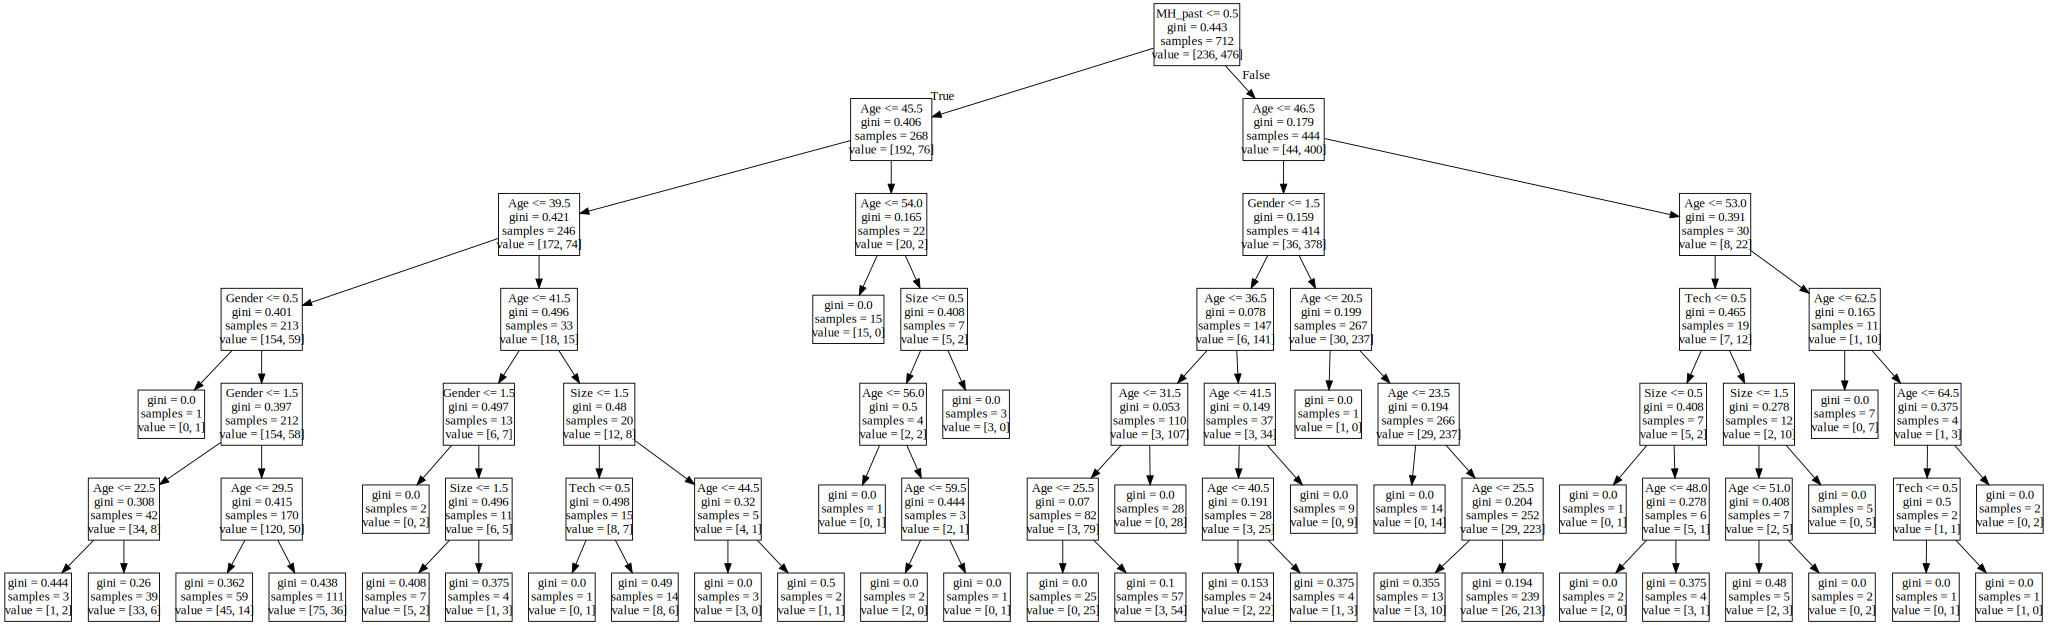

In [29]:
graph

Figure4: Tree using decison tree classifier with depth of 6 and taking past into consideration.

In [30]:
MH16fp['pred'] = clf.predict(MH16fp.values)
MH16fp['test'] = MH16_['MH_now']

In [31]:
MH16fp.head()

,MH_past,Size,Tech,Age,Gender,pred,test
1,1,0,1.0,29,2,1,1
4,1,0,0.0,43,1,1,1
6,0,0,1.0,30,2,0,0
7,1,2,1.0,37,1,1,1
8,1,0,0.0,44,1,1,1


Without "MH_past"

In [32]:
clf =  tree.DecisionTreeClassifier(max_depth=6, criterion="gini", random_state=222).fit(
    MH16f.values, MH16_['MH_now'])
clf.score(MH16f.values, MH16_['MH_now'])

0.699438202247191

In [33]:
dot_data = tree.export_graphviz(clf, feature_names=MH16f.columns, out_file=None) 
graph = graphviz.Source(dot_data)

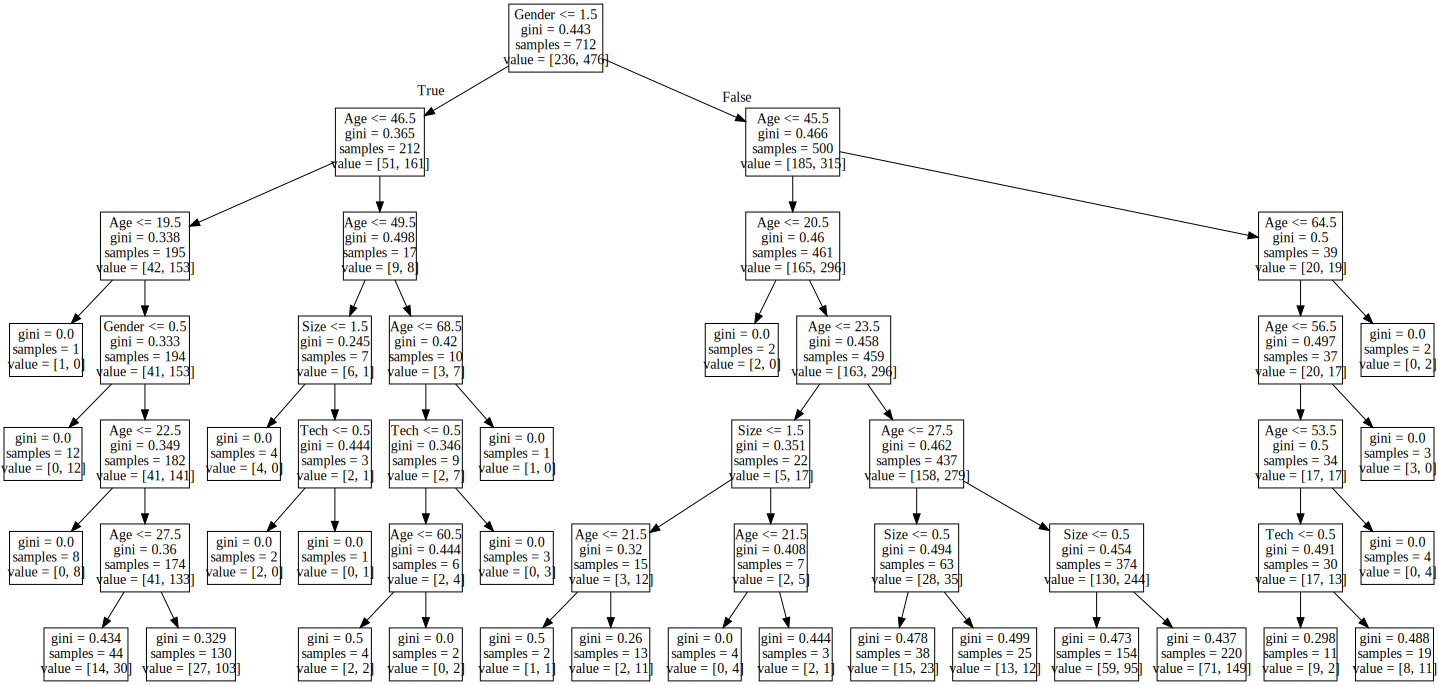

In [34]:
graph

Figure5: Tree using decison tree classifier with depth of 6 and without taking past into consideration.

In [35]:
MH16f['pred'] = clf.predict(MH16f.values)
MH16f['test'] = MH16_['MH_now']

/Users/Christine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
MH16f.head()

,Size,Tech,Age,Gender,pred,test
1,0,1.0,29,2,1,1
4,0,0.0,43,1,1,1
6,0,1.0,30,2,1,0
7,2,1.0,37,1,1,1
8,0,0.0,44,1,1,1


#### Random Forest Classifier

In [37]:
MH16fp = MH16_[['MH_past', 'Size', 'Tech', 'Age', 'Gender']]
MH16fp.head()

,MH_past,Size,Tech,Age,Gender
1,1,0,1.0,29,2
4,1,0,0.0,43,1
6,0,0,1.0,30,2
7,1,2,1.0,37,1
8,1,0,0.0,44,1


In [38]:
MH16f = MH16_[['Size', 'Tech', 'Age', 'Gender']]
MH16f.head()

,Size,Tech,Age,Gender
1,0,1.0,29,2
4,0,0.0,43,1
6,0,1.0,30,2
7,2,1.0,37,1
8,0,0.0,44,1


With 'MH_past'

In [39]:
clf =  ensemble.RandomForestClassifier(max_depth=6, criterion="gini", random_state=222).fit(
    MH16fp.values, MH16_['MH_now'])
clf.score(MH16fp.values, MH16_['MH_now'])

0.8497191011235955

In [40]:
dot_data = tree.export_graphviz(clf.estimators_[0], feature_names=MH16fp.columns, out_file=None) 
graph = graphviz.Source(dot_data)

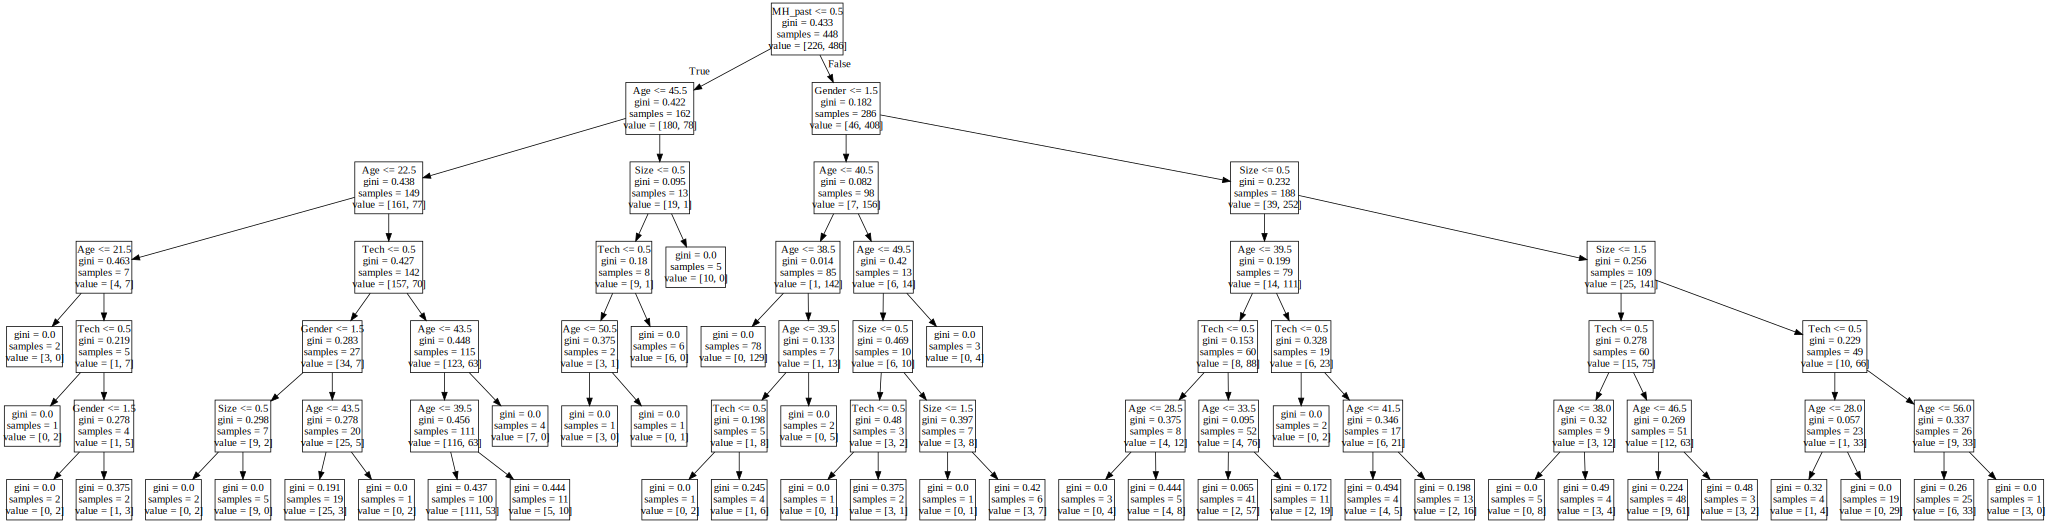

In [41]:
graph

Figure6: Tree using random forest classifier with depth of 6 and taking past into consideration.

In [42]:
dot_data = tree.export_graphviz(clf.estimators_[1], feature_names=MH16fp.columns, out_file=None) 
graph = graphviz.Source(dot_data)

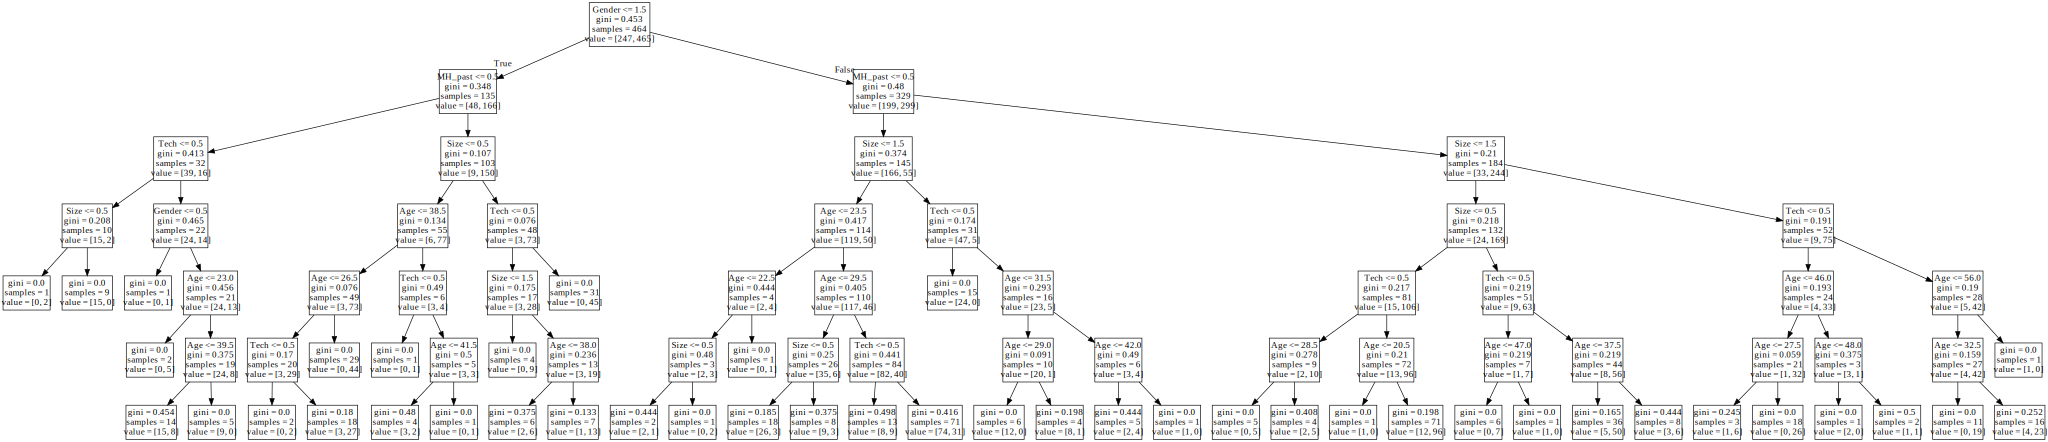

In [43]:
graph

Figure7: Tree using random forest classifier with depth of 6 and taking past into consideration.

In [44]:
MH16fp['pred'] = clf.predict(MH16fp.values)
MH16fp['test'] = MH16_['MH_now']

In [45]:
MH16fp.head()

,MH_past,Size,Tech,Age,Gender,pred,test
1,1,0,1.0,29,2,1,1
4,1,0,0.0,43,1,1,1
6,0,0,1.0,30,2,0,0
7,1,2,1.0,37,1,1,1
8,1,0,0.0,44,1,1,1


Without "MH_past"

In [46]:
clf =  ensemble.RandomForestClassifier(max_depth=6, criterion="gini", random_state=222).fit(
    MH16f.values, MH16_['MH_now'])
clf.score(MH16f.values, MH16_['MH_now'])

0.7106741573033708

In [47]:
dot_data = tree.export_graphviz(clf.estimators_[0], feature_names=MH16f.columns, out_file=None) 
graph = graphviz.Source(dot_data)

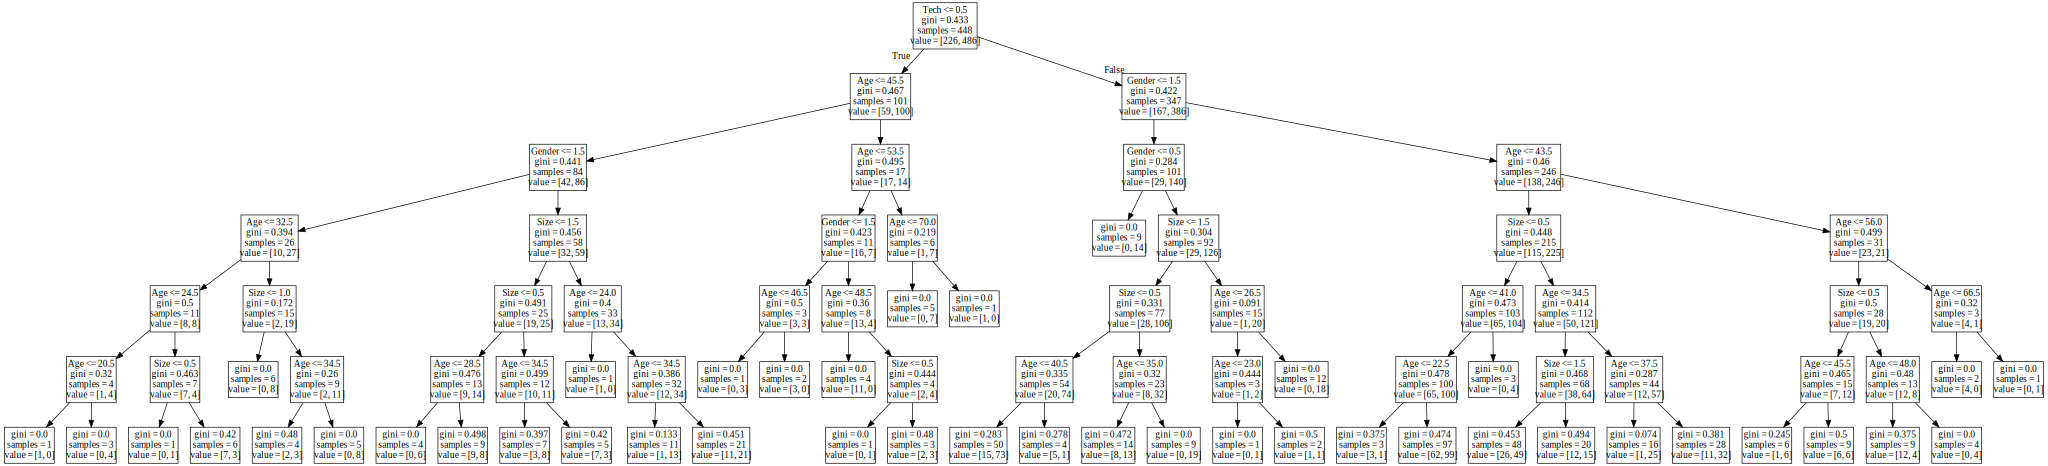

In [48]:
graph

Figure8: Tree using random forest classifier with depth of 6 and without taking past into consideration.

In [49]:
MH16f['pred'] = clf.predict(MH16f.values)
MH16f['test'] = MH16_['MH_now']

/Users/Christine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
MH16f.head()

,Size,Tech,Age,Gender,pred,test
1,0,1.0,29,2,1,1
4,0,0.0,43,1,1,1
6,0,1.0,30,2,1,0
7,2,1.0,37,1,1,1
8,0,0.0,44,1,1,1


## Logistics Regression

In [51]:
MH16_[['MH_now']].head()

,MH_now
1,1
4,1
6,0
7,1
8,1


**MH16regp is the dataset used for logistics regression below that takes past mental health condition into account as a factor.**

In [52]:
MH16regp = MH16_[['MH_past', 'Size', 'Tech', 'Age', 'Gender']]
MH16regp.head()

,MH_past,Size,Tech,Age,Gender
1,1,0,1.0,29,2
4,1,0,0.0,43,1
6,0,0,1.0,30,2
7,1,2,1.0,37,1
8,1,0,0.0,44,1


In [53]:
mod = LogisticRegression().fit(MH16regp, MH16_[['MH_now']])

/Users/Christine/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
MH16regp['pred'] = mod.predict(MH16regp)

In [55]:
mod.coef_

array([[ 2.99209978, -0.06245796, -0.02920992, -0.01802684, -0.27355581]])

In [56]:
cm = confusion_matrix(MH16_['MH_now'], MH16regp['pred'])
MSE = mean_squared_error(MH16_['MH_now'], MH16regp['pred'])
ACC = (cm[0][0] + cm[1][1]) / (len(MH16regp['pred']))
print("Accuracy rate is ", ACC)
print("Mean squared error is ", MSE)

Accuracy rate is  0.8314606741573034
Mean squared error is  0.16853932584269662


**MH16reg is the dataset used for logistics regression below without taking past mental health condition into account as a factor.**

In [57]:
MH16reg = MH16_[['Size', 'Tech', 'Age', 'Gender']]
MH16reg.head()

,Size,Tech,Age,Gender
1,0,1.0,29,2
4,0,0.0,43,1
6,0,1.0,30,2
7,2,1.0,37,1
8,0,0.0,44,1


In [58]:
mod = LogisticRegression().fit(MH16reg, MH16_[['MH_now']])

/Users/Christine/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
MH16reg['pred'] = mod.predict(MH16reg)

/Users/Christine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
mod.coef_

array([[ 0.06353557,  0.15154421, -0.00830672, -0.53725909]])

In [61]:
cm = confusion_matrix(MH16_['MH_now'], MH16reg['pred'])
MSE = mean_squared_error(MH16_['MH_now'], MH16reg['pred'])
ACC = (cm[0][0] + cm[1][1]) / (len(MH16reg['pred']))
print("Accuracy rate is ", ACC)
print("Mean squared error is ", MSE)

Accuracy rate is  0.6685393258426966
Mean squared error is  0.33146067415730335
